<h1 align=center><font size="4"> Airbnb price prediction: Predicting the prices of USA-based rentals using supervised learning algorithms (Mutlivariate Linear Regression)</font></h1>

<h1 align=center><font size="2"> Author: Shahzaib S. Warraich </font></h1>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#load_dataset">Loading the dataset</a></li>
        <li><a href="#evaluation">Data wrangling and exploratory data analysis</a></li>
         <li><a href="#evaluation">Conclusion</a></li>
         <li><a href="#evaluation">Model training and evaluation</a></li>
       
       
        
        
       
    
</div>
<br>
<hr>


<h2 id="load_dataset">1. Loading the dataset</h2>


|Field name|Description|
|--- |--- |
|id|rental's id|
|name|rental's name|
|host_id|hosting party's id|
|host_name|name of the host|
|neighbourhood_group|neigbourhood's locality |
|latitude|latitude of the location|
|longitude|longitude of the location|
|room_type|the type of the rental (private room/shared room/entire home)|
|minimum_nights|minimum number of nights required to book|
|number_of_reviews|total reviews given|
|last_review|date of last review|
|reviews_per_month|number of reviews per month|
|calculated_host_listings_count|listings count|
|availability_365|number of days available in a year|
|city|the rental's city|
|price|the listed price of the rental|


In [1]:
import pandas as pd
df=pd.read_csv("AB_NYC_2019.csv")
df.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,10/19/2018,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,5/21/2019,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,NaN,1,365,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,7/5/2019,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,11/19/2018,0.10,1,0,80
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,6/22/2019,0.59,1,129,200
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,10/5/2017,0.40,1,0,60
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,2,430,6/24/2019,3.47,1,220,79
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,2,118,7/21/2017,0.99,1,0,79
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,1,160,6/9/2019,1.33,4,188,150


<h2 id="load_dataset">2. Data wrangling and exploratory data analysis </h2>

In [2]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

In [3]:
df["last_review"]=pd.to_datetime(df["last_review"])
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
price                                      int64
dtype: object

In [4]:
df.shape

(48895, 16)

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price'],
      dtype='object')

In [6]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [7]:
df['room_type']=df['room_type'].astype("category")
df['room_type'].describe()

count               48895
unique                  3
top       Entire home/apt
freq                25409
Name: room_type, dtype: object

In [8]:
#Converting the yes/no fields to discrete form for modelling

from sklearn.preprocessing import LabelEncoder

number=LabelEncoder()
df['room_type']=number.fit_transform(df['room_type'].astype('str')) # entire home/apt (0), Private room (1), Shared room (2) 


df.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,1,3,0,NaT,NaN,1,365,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0,10,9,2018-11-19,0.10,1,0,80
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,0,3,74,2019-06-22,0.59,1,129,200
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,1,45,49,2017-10-05,0.40,1,0,60
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,1,2,430,2019-06-24,3.47,1,220,79
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,1,2,118,2017-07-21,0.99,1,0,79
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,0,1,160,2019-06-09,1.33,4,188,150


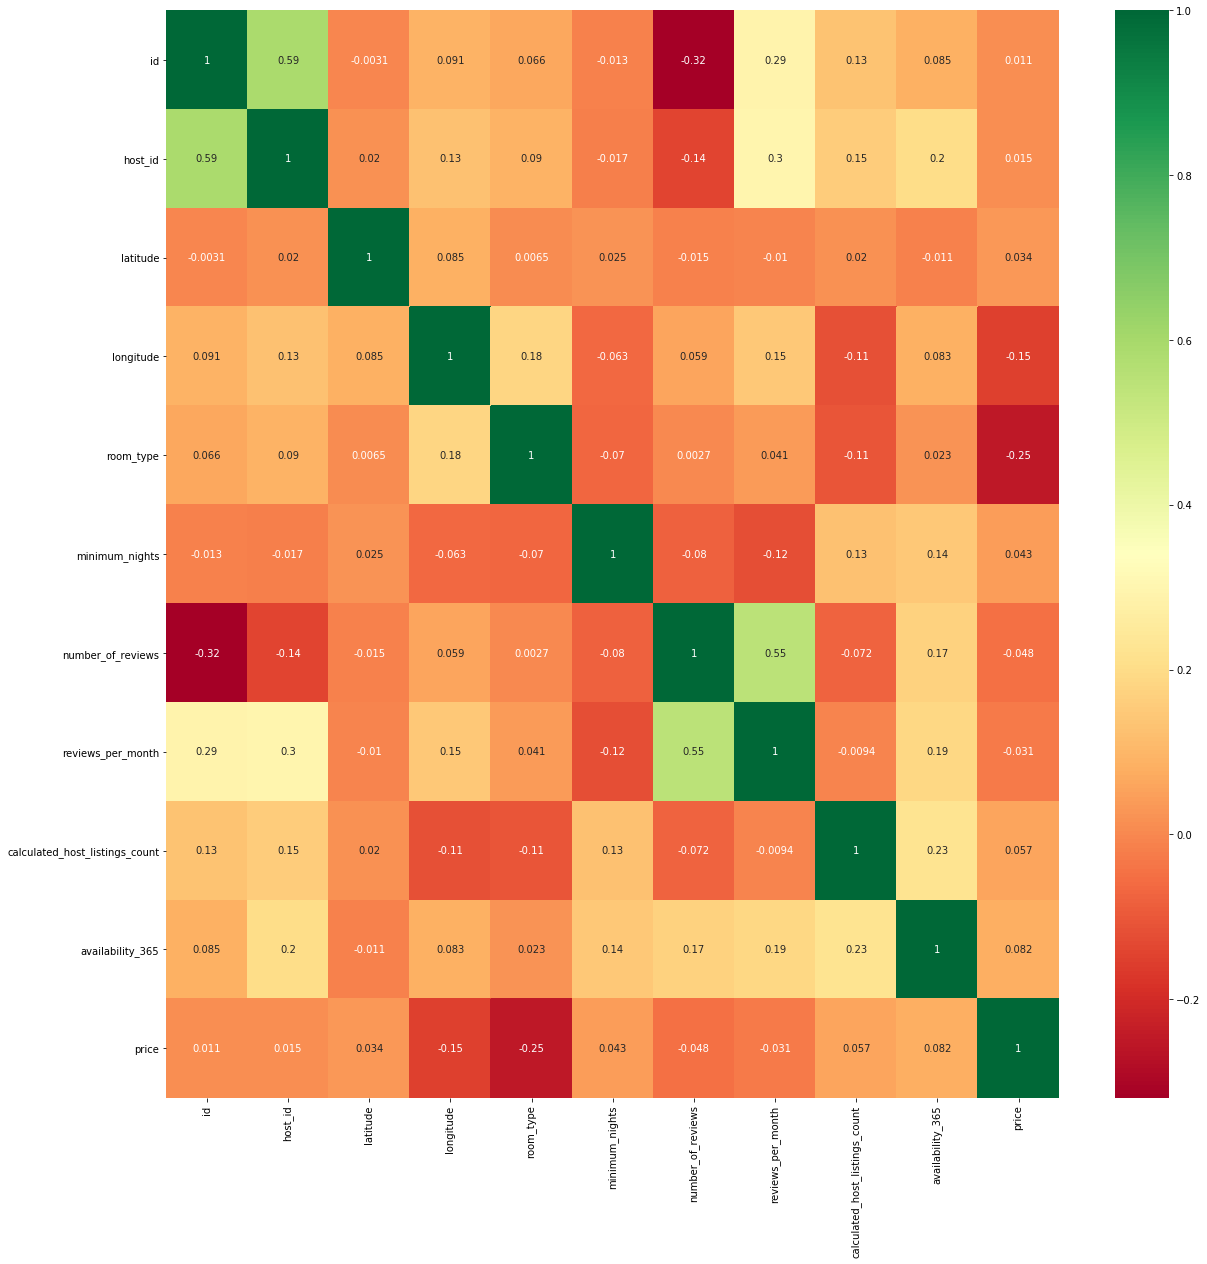

In [9]:
#get correlations of each feature in dataset

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

In [10]:
df[["room_type","price"]].corr()

,room_type,price
room_type,1.00000,-0.24935
price,-0.24935,1.00000


(0, 10500.812691835488)

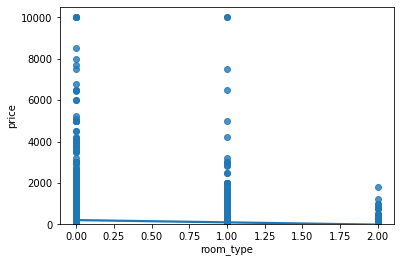

In [11]:
sns.regplot(x="room_type", y="price", data=df)
plt.ylim(0,)

In [12]:
df[["longitude","price"]].corr()

,longitude,price
longitude,1.000000,-0.150019
price,-0.150019,1.000000


(0, 10502.21442214865)

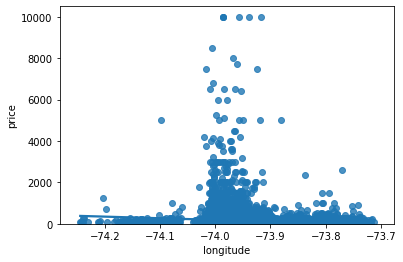

In [13]:
sns.regplot(x="longitude", y="price", data=df)
plt.ylim(0,)

In [14]:
df[["room_type","longitude","price"]].corr()

,room_type,longitude,price
room_type,1.000000,0.184341,-0.249350
longitude,0.184341,1.000000,-0.150019
price,-0.249350,-0.150019,1.000000


<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

In [15]:
df["room_type"]=df["room_type"].astype('category')
df["room_type"].dtypes

CategoricalDtype(categories=[0, 1, 2], ordered=False)

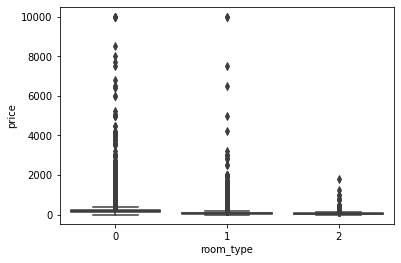

In [16]:
sns.boxplot(x="room_type", y="price", data=df)

<h2 id="load_dataset">3. Conclusion</h2>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the rental's price. We have narrowed it down to the following variables:</p>

<ul>
    <li>room_type</li>
    <li>number_of_reviews</li>
 
    
   
</ul>
    


<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

<h2 id="load_dataset">4. Model training and evaluation</h2>

In [17]:
X= df[['room_type','longitude']].values
X[0:20]      

array([[1, -73.97237],
       [0, -73.98376999999999],
       [1, -73.9419],
       [0, -73.95976],
       [0, -73.94399],
       [0, -73.975],
       [1, -73.95596],
       [1, -73.98493],
       [1, -73.96723],
       [0, -73.99037],
       [0, -73.96545],
       [1, -73.98867],
       [1, -73.98779],
       [1, -73.96113000000001],
       [0, -74.00525],
       [0, -73.95352],
       [0, -73.97185],
       [1, -73.99501],
       [0, -73.94694],
       [0, -73.94872]], dtype=object)

In [18]:
y = df['price'].values
y[0:20]

array([149, 225, 150,  89,  80, 200,  60,  79,  79, 150, 135,  85,  89,
        85, 120, 140, 215, 140,  99, 190], dtype=int64)

In [19]:
from sklearn import preprocessing

#normalize data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.90935915, -0.43765209],
       [-0.924247  , -0.68463915],
       [ 0.90935915,  0.22249666],
       [-0.924247  , -0.16444973],
       [-0.924247  ,  0.1772157 ]])

In [20]:
from sklearn.model_selection import train_test_split

#Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (39116, 2) (39116,)
Test set: (9779, 2) (9779,)


In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X_train,y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [-55.76856419 -26.00182779]


In [22]:
import numpy as np
y_hat= regr.predict(X_test)
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_test , y_hat) )
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))


R2-score: 0.08
Mean absolute error: 76.20


In [23]:
from sklearn.neural_network import MLPRegressor

mlp_regr = MLPRegressor().fit(X_train, y_train)
y_hat_mlp=mlp_regr.predict(X_test)
print("R2-score: %.2f" % r2_score(y_test , y_hat_mlp) )
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_mlp - y_test)))


R2-score: 0.09
Mean absolute error: 72.03
